In [23]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

Task 1

In [24]:
def f(x):
    return (P0(x) * x[0]) / 0.7 + Ef(x)

def g1(x):
    return 101000 - W(x)


def g2(x):
    return P0(x) - 1000


def g3(x):
    return delta_T(x) - 50


def g4(x):
    return 0.001 - h(x)


def g5(x):
    return x[1] - x[2]


def g6(x):
    return ((0.0307 * x[0])/(772.8 * np.pi * P0(x) * h(x) * x[2])) - 0.001


def g7(x):
    return (W(x) / (np.pi * (x[2]**2 - x[1]**2))) - 5000



def W(x):
    return (np.pi * P0(x) / 2) * ((x[2]**2 - x[1]**2) / np.log(x[2] / x[1]))

def P0(x):
    return ((6 * 10**-6 * x[3] * x[0]) * np.log(x[2] / x[1])) /  (np.pi * h(x)**3)

def Ef(x):
    return 143.308 * delta_T(x) * x[0]

def delta_T(x):
    return 2 * (10**P(x) - 560)

def P(x):
    return (np.log10(np.log10(8.122 * x[3]  + 0.8)) - 10.04) /  -3.55

def h(x):
    return (((1500 * np.pi) / 60)**2) * (((2 * 10**-6 * np.pi * x[3]) / Ef(x)) * ((x[2]**4 - x[1]**4)/4) )


x = np.array([4.19, 11.57, 6.69, 10.65])

print("Optimal Value:", f(x))
print("constraint function output of g1:", g1(x))
print("constraint function output of g2:", g2(x))
print("constarint function output of g3:", g3(x))
print("constraint function output of g4:", g4(x))
print("constraint function output of g5:", g5(x))
print("constraint function output of g6:", g6(x))
print("constraint function output of g7:", g7(x))


Optimal Value: -1784.0773507231927
constraint function output of g1: 101000.01528759542
constraint function output of g2: -1000.0000598304209
constarint function output of g3: -52.97118117373543
constraint function output of g4: -0.9196377239881502
constraint function output of g5: 4.88
constraint function output of g6: -0.14477999681964235
constraint function output of g7: -4999.999945390436


Task 2

In [32]:
def random_search_with_penalty(function, g, penalty=1e6, num_iter=10000, seed=None):
    np.random.seed(seed)

    best_sln = None
    best_obj_val = np.inf

    for _ in range(num_iter):
        cand_sln = np.random.uniform(low=[1, 1, 1, 1], high=[16, 16, 16, 16])

        pnlty_trm = sum(max(0, constraint(cand_sln)) for constraint in g)
        obj_val = function(cand_sln) + penalty * pnlty_trm

        if all(constraint(cand_sln) <= 0 for constraint in g):
            if obj_val < best_obj_val:
                best_sln = cand_sln
                best_obj_val = obj_val

    return best_sln, best_obj_val

g = [g1, g2, g3, g4, g5, g6, g7]

best_sln, best_obj_val = random_search_with_penalty(f, g, penalty=1e6, num_iter=10000, seed=45)

print("Best Solution:", best_sln)
print("Best Objective Value:", best_obj_val)

Best Solution: [14.41726809  8.94053189  9.47981247  7.63681988]
Best Objective Value: 55297.63607532341


Task 3

In [33]:

def simulated_annealing(function, g, penalty=1e6, initial_temp=1.0, cooling_rate=0.95, num_iter=10000, seed=None):
    np.random.seed(seed)

    current_solution = np.random.uniform(low=[1, 1, 1, 1], high=[16, 16, 16, 16])
    best_solution = current_solution
    temperature = initial_temp

    for iteration in range(num_iter):
        candidate_solution = current_solution + np.random.normal(scale=temperature, size=len(current_solution))

        penalty_term = sum(max(0, constraint(candidate_solution)) for constraint in g)
        candidate_objective_value = max(0, function(candidate_solution)) +  1e6 * penalty_term
        acceptance_prob = np.exp((function(current_solution) - candidate_objective_value) / temperature)

        if (candidate_objective_value < function(current_solution)) or (np.random.rand() < acceptance_prob):
            current_solution = candidate_solution

        if function(current_solution) < function(best_solution):
            best_solution = current_solution

        temperature *= cooling_rate
    return best_solution, function(best_solution)

g = [g1, g2, g3, g4, g5, g6, g7]

best_solution_sa, best_objective_value_sa = simulated_annealing(f, g, penalty=1e6, initial_temp=10.0, cooling_rate=0.95, num_iter=10000, seed=23)

print("Best Solution (Simulated Annealing):", best_solution_sa)
print("Best Objective Value (Simulated Annealing):", best_objective_value_sa)

<ipython-input-24-4578d4617bcb>:46: RuntimeWarning: invalid value encountered in log10
  return (np.log10(np.log10(8.122 * x[3]  + 0.8)) - 10.04) /  -3.55
<ipython-input-33-5124d9edc9af>:13: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp((function(current_solution) - candidate_objective_value) / temperature)
<ipython-input-24-4578d4617bcb>:37: RuntimeWarning: invalid value encountered in log
  return ((6 * 10**-6 * x[3] * x[0]) * np.log(x[2] / x[1])) /  (np.pi * h(x)**3)
<ipython-input-24-4578d4617bcb>:34: RuntimeWarning: invalid value encountered in log
  return (np.pi * P0(x) / 2) * ((x[2]**2 - x[1]**2) / np.log(x[2] / x[1]))


Best Solution (Simulated Annealing): [ 8.75946826 15.20443906 12.48189639  5.23593766]
Best Objective Value (Simulated Annealing): 65275.851527928346


Task 4

In [ ]:
def run_optimization_algorithm(algorithm, repetitions, function, g, num_evaluations=10000, seed=None):
    total_runtimes = []
    best_objective_values = []

    for i in range(repetitions):
        current_seed = [62, 12, 87, 94, 65, 17, 35, 29, 23, 54, 43, 46, 26, 53, 934, 46, 62, 732, 76, 34, 78]
        best_solution, best_objective_value = algorithm(function, g, penalty=2e6, num_iter=num_evaluations, seed=current_seed[i])
        print(current_seed[i])
        print(best_objective_value)
        best_objective_values.append(best_objective_value)

    return total_runtimes, best_objective_values


rs_runtimes, rs_objective_values = run_optimization_algorithm(random_search, 21, f, g, num_evaluations=10000, seed=55)

sa_runtimes, sa_objective_values = run_optimization_algorithm(simulated_annealing, 21, f, g, num_evaluations=10000, seed=55)

62
57512.794568580306
12
41550.204012428716
87
49252.28750255954
94
45540.000667732995
65
52580.69357910015
17
39437.42186477552
35
39614.48806396733
29
44365.97915973333
23
61130.35223325828
54
56818.04084088361
43
51820.45475063368
46
47779.41155169817
26
45312.51947710915
53
40456.38926423966
934
52969.76960585777
46
47779.41155169817
62
57512.794568580306
732
32985.46677478328
76
53341.91486818714
34
42615.633988193
78
37065.89599670014
62
5659.267555993295
12
4272.822855489526
87
346421.9948562075


In [29]:
all_results = rs_objective_values + sa_objective_values
all_labels = ['Random Search'] * len(rs_objective_values) + ['Simulated Annealing'] * len(sa_objective_values)

In [30]:
data = pd.DataFrame({'Optimizer': all_labels, 'Objective Value': all_results})

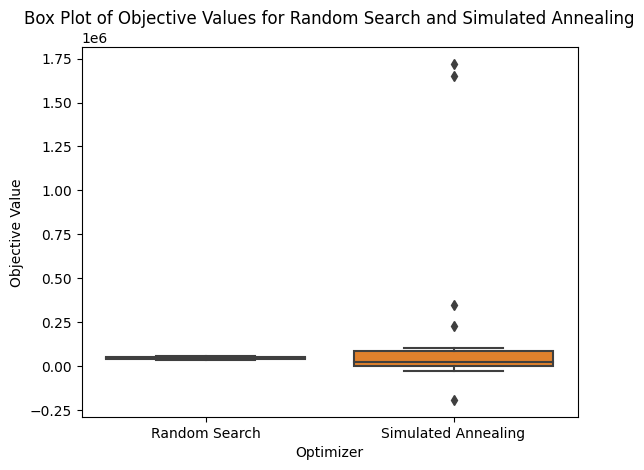

In [31]:
plt.figure()
sns.boxplot(x='Optimizer', y='Objective Value', data=data)
plt.title('Box Plot of Objective Values for Random Search and Simulated Annealing')
plt.ylabel('Objective Value')
plt.show()